In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

dir = "/content/drive/MyDrive/Tugas_Akhir/dataset"

Mounted at /content/drive/


Total Files : 1398


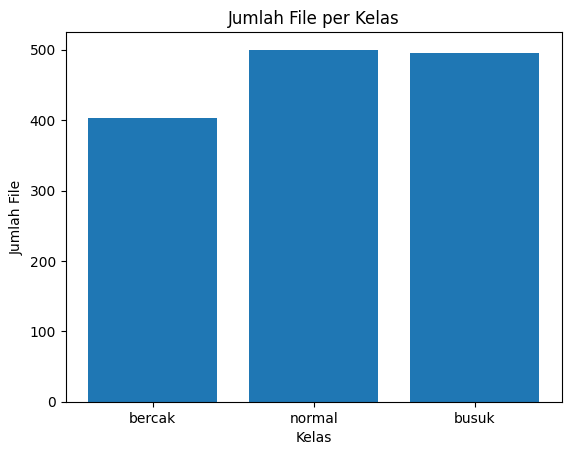

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt
import os

label = {}
total_files = 0
for i in os.listdir(dir):
    counting = len(os.listdir(os.path.join(dir, i)))
    label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

plt.bar(label.keys(), label.values());
plt.title("Jumlah File per Kelas");
plt.xlabel('Kelas');
plt.ylabel('Jumlah File');

In [ ]:
import tensorflow as tf

data = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.3
)

In [ ]:
image_size = (200,200)
batch_size = 32
seed = 999

train_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='training',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

valid_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='validation',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

Found 980 images belonging to 3 classes.
Found 418 images belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Rescaling(1./255)
  ]
)



In [ ]:
augmentation = tf.keras.models.Sequential(data_augmentation)

# **Modeling**

Skenario 7 (optimizer adam, epoch : 5, learning rate = 0.01)

In [ ]:
base_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(image_size[0], image_size[1], 3),
                                                        pooling='max')
base_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
model_skenario_7 = densenet_model
densenet_model_7 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
densenet_model_7.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
  )

In [ ]:
densenet_hist_7 = densenet_model_7.fit(
    train_data,
    epochs=5,
    validation_data = valid_data
)

Epoch 1/5
31/31 [==============================] - 573s 18s/step - loss: 2.8788 - accuracy: 0.6418 - val_loss: 1.0206 - val_accuracy: 0.8684
Epoch 2/5
31/31 [==============================] - 467s 15s/step - loss: 0.5444 - accuracy: 0.8990 - val_loss: 0.4826 - val_accuracy: 0.9187
Epoch 3/5
31/31 [==============================] - 472s 15s/step - loss: 0.3891 - accuracy: 0.9061 - val_loss: 0.6091 - val_accuracy: 0.8780
Epoch 4/5
31/31 [==============================] - 474s 15s/step - loss: 0.5430 - accuracy: 0.8837 - val_loss: 0.4346 - val_accuracy: 0.9330
Epoch 5/5
31/31 [==============================] - 461s 15s/step - loss: 0.3931 - accuracy: 0.9163 - val_loss: 0.3891 - val_accuracy: 0.9306


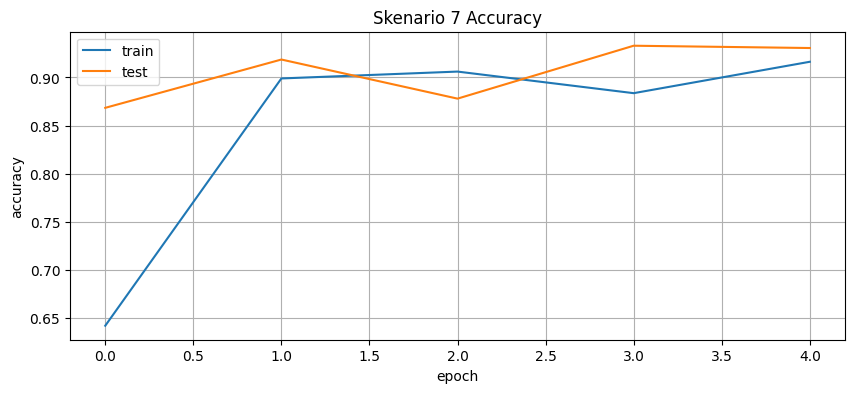

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(densenet_hist_7.history['accuracy'])
plt.plot(densenet_hist_7.history['val_accuracy'])
plt.title('Skenario 7 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 8 (optimizer : RMSprop, Epoch : 5, learning rate : 0.01)

In [ ]:
model_skenario_8 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

model_skenario_8 = densenet_model
model_skenario_8.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['accuracy']
  )

In [ ]:
model_hist_8 = model_skenario_8.fit(
    train_data,
    epochs=5,
    validation_data = valid_data
)

Epoch 1/5
31/31 [==============================] - 488s 15s/step - loss: 5.9196 - accuracy: 0.6388 - val_loss: 0.5750 - val_accuracy: 0.8780
Epoch 2/5
31/31 [==============================] - 454s 15s/step - loss: 2.5638 - accuracy: 0.7592 - val_loss: 0.6176 - val_accuracy: 0.8971
Epoch 3/5
31/31 [==============================] - 462s 15s/step - loss: 1.6550 - accuracy: 0.8255 - val_loss: 3.0329 - val_accuracy: 0.7536
Epoch 4/5
31/31 [==============================] - 465s 15s/step - loss: 1.8631 - accuracy: 0.8429 - val_loss: 5.6151 - val_accuracy: 0.6746
Epoch 5/5
31/31 [==============================] - 462s 15s/step - loss: 1.4974 - accuracy: 0.8765 - val_loss: 0.8783 - val_accuracy: 0.9067


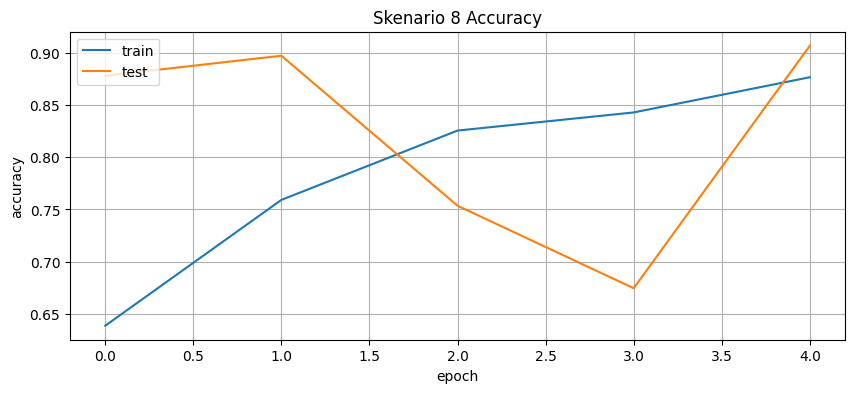

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_8.history['accuracy'])
plt.plot(model_hist_8.history['val_accuracy'])
plt.title('Skenario 8 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 9 (optimizer : RMSprop, Epoch : 5, learning rate 0.01)

In [ ]:
model_skenario_9 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

model_skenario_9 = densenet_model
model_skenario_9.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
  )

In [ ]:
model_hist_9 = model_skenario_9.fit(
    train_data,
    epochs=5,
    validation_data = valid_data
)

Epoch 1/5
31/31 [==============================] - 489s 15s/step - loss: 3.7650 - accuracy: 0.6469 - val_loss: 0.4557 - val_accuracy: 0.8971
Epoch 2/5
31/31 [==============================] - 463s 15s/step - loss: 0.7987 - accuracy: 0.8408 - val_loss: 2.8235 - val_accuracy: 0.6986
Epoch 3/5
31/31 [==============================] - 456s 15s/step - loss: 0.9381 - accuracy: 0.8306 - val_loss: 0.5172 - val_accuracy: 0.8947
Epoch 4/5
31/31 [==============================] - 461s 15s/step - loss: 0.4986 - accuracy: 0.8806 - val_loss: 0.4564 - val_accuracy: 0.9067
Epoch 5/5
31/31 [==============================] - 466s 15s/step - loss: 0.2737 - accuracy: 0.9133 - val_loss: 0.3398 - val_accuracy: 0.9354


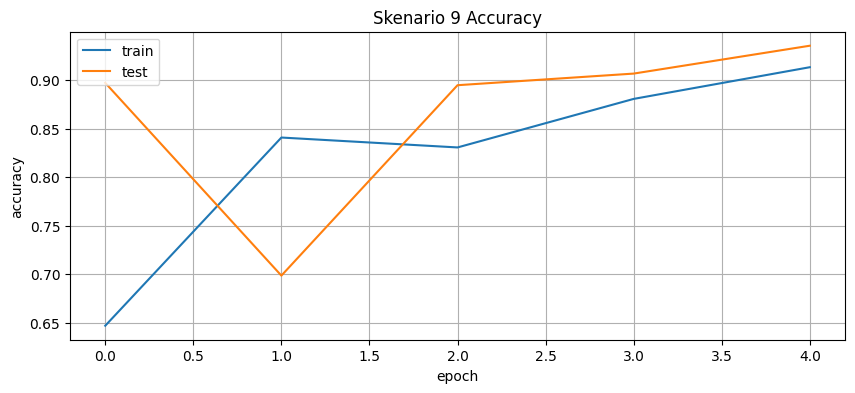

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_9.history['accuracy'])
plt.plot(model_hist_9.history['val_accuracy'])
plt.title('Skenario 9 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()